### Building UCI German Credit Data Set model - Decision Tree and Random Forest

- 1000 samples with 700 credit-worthy samples and 300 not credit-worthy samples
- 20 features with 17 categorical features and 3 numeric features
- Detail of features are written in [here](https://onlinecourses.science.psu.edu/stat857/node/222)

Model: Decision Tree
Number of samples: 600
Accuracy on Training samples: 0.785
Accuracy on Testing samples: 0.65


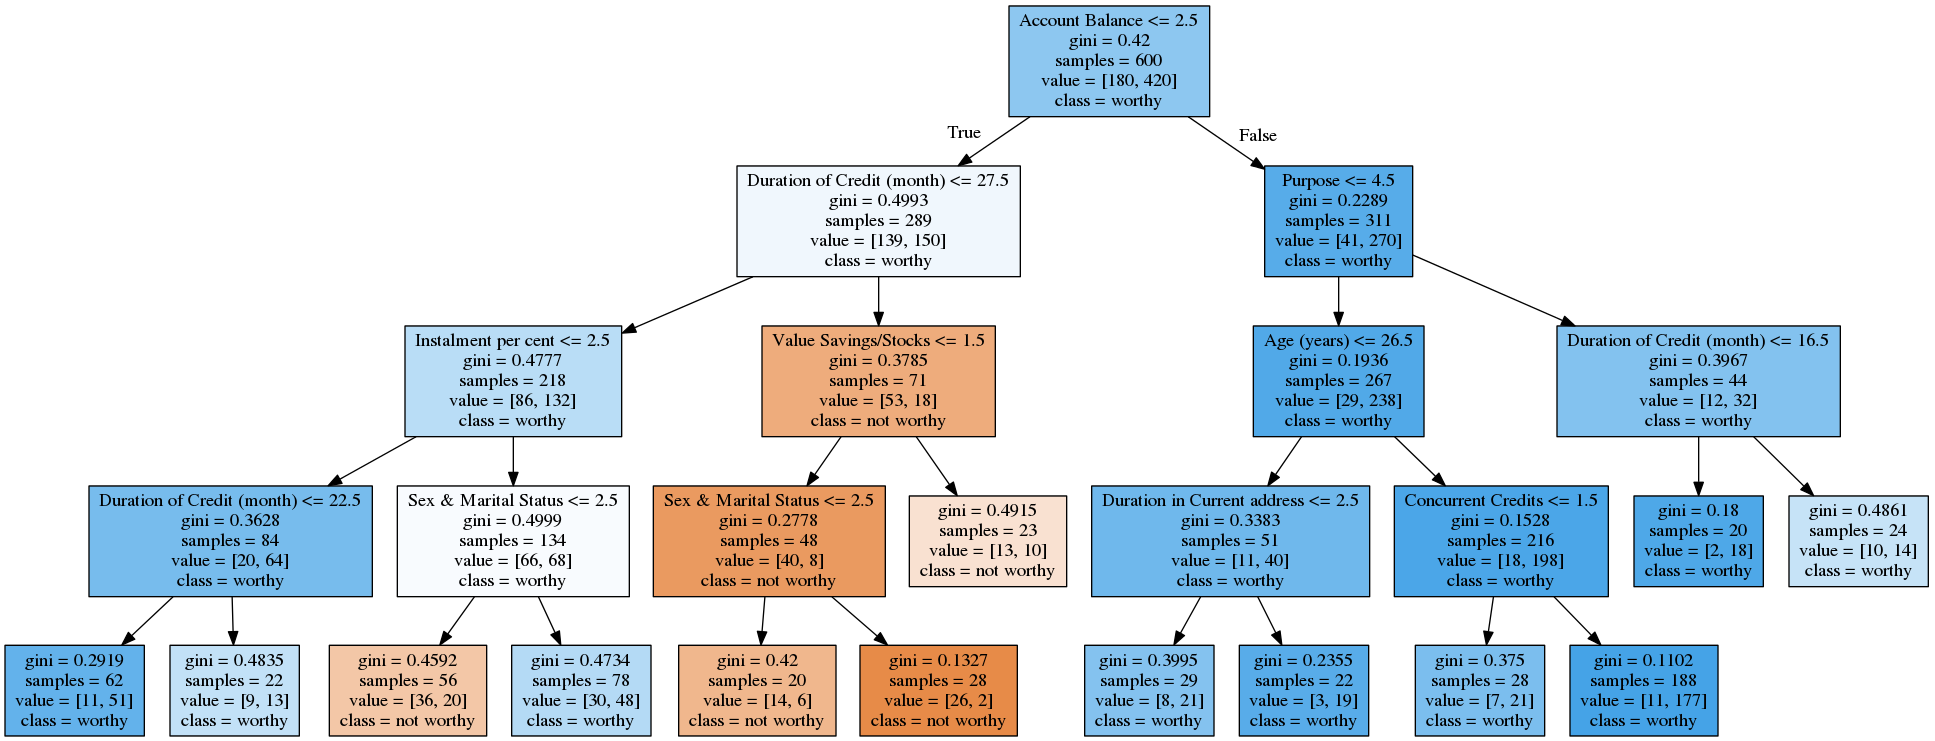

In [19]:
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import tree
import pydotplus 
from sklearn.model_selection import cross_val_score
from IPython.display import Image 
from sklearn.ensemble import RandomForestClassifier
import pre_data as pd



def decision_tree(num):
    # get data for training and testing
    raw_train, raw_test = pd.get_data(num)
    feature_name = ['Account Balance', 'Duration of Credit (month)', 'Payment Status of Previous Credit', 'Purpose', 'Credit Amount', 'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 'Most valuable available asset', 'Age (years)', 'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker']
    label_name = ['not worthy', 'worthy']
    X_train = raw_train[:, 1:]
    Y_train = raw_train[:, 0]
    X_test = raw_test[:, 1:]
    Y_test = raw_test[:, 0]

    ## Build model: Decision tree
    clf_DT = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.03)
    clf_DT = clf_DT.fit(X_train, Y_train)
    #print(clf_DT.predict(X_test))
    print("Model: Decision Tree")
    print("Number of samples: {}".format(num))
    print("Accuracy on Training samples: {}".format(clf_DT.score(X_train, Y_train)))
    print("Accuracy on Testing samples: {}".format(clf_DT.score(X_test, Y_test)))
    #print("Average accuracy of 10 decision trees: {}".format(np.sum(cross_val_score(clf_DT, X_train, Y_train, cv=10) / 10)))

    ## Plot decision tree
    dot_data = tree.export_graphviz(clf_DT, out_file=None, feature_names = feature_name, class_names = label_name, filled = True) 
    graph = pydotplus.graph_from_dot_data(dot_data) 
    display(Image(graph.create_png()))


decision_tree(600)

In [15]:
## Build model: Random Forest
def RF(num):
    raw_train, raw_test = pd.get_data(num)
    X_train = raw_train[:, 1:]
    Y_train = raw_train[:, 0]
    X_test = raw_test[:, 1:]
    Y_test = raw_test[:, 0]
    clf_RF = RandomForestClassifier(n_estimators = 150, max_depth = 5, min_samples_leaf = 0.03)
    clf_RF = clf_RF.fit(X_train, Y_train)
    print("Model: Random Forest")
    print("Number of samples: {}".format(num))
    print("Accuracy on Training samples: {}".format(clf_RF.score(X_train, Y_train)))
    print("Accuracy on Testing samples: {}".format(clf_RF.score(X_test, Y_test)))
    print("Average accuracy of 10 RFs: {}".format(np.sum(cross_val_score(clf_RF, X_train, Y_train, cv=10) / 10)))

RF(500)

Model: Random Forest
Number of samples: 500
Accuracy on Training samples: 0.784
Accuracy on Testing samples: 0.7
Average accuracy of 10 RFs: 0.73
